In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('heart_disease.csv')

In [182]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        293 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


###### age: age in years
###### sex(1 = male; 0 = female)
###### cp : chest pain type ( 0-2 states different types of angina and  3 means no chest pain )
###### trestbps : resting blood pressure (in mm Hg on admission to the hospital)
###### chol : serum cholestoral in mg/dl
###### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
###### restec : gresting electrocardiographic results
###### thalach : maximum heart rate achieved
###### exang : exercise induced angina (1 = yes; 0 = no)
###### oldpeak : ST depression induced by exercise relative to rest
###### slope : the slope of the peak exercise ST segment
###### ca : number of major vessels (0-3) colored by flourosopy
###### thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
###### target: 1 or 

In [119]:
df.isnull().sum()

age          0
sex          0
cp          10
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

C:\Users\JOSEPH\AppData\Local\Temp\ipykernel_9664\230510291.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


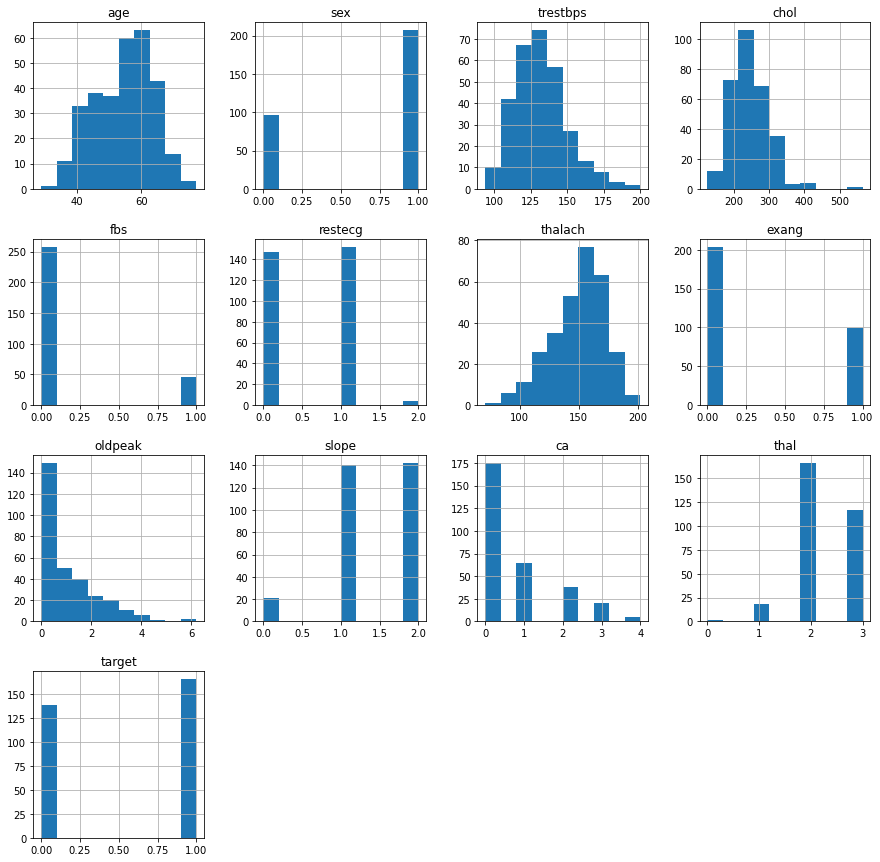

In [120]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [121]:
df.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### As the coulmn cp (chest pain) has missing values, we need to impute the data. 

###### The data is numeric and hence mean stratergy will be a suitable choice.

In [122]:
#from sklearn.preprocessing import Imputer
#imput = Imputer(missing_values='NaN',strategy='mean')
#df = list(imput.fit_transform(df))

#for i in range(303):
    #for j in range(14):
        #df[i][j] = math.ceil(df[i][j])

In [123]:
df = pd.DataFrame(df)

In [124]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',6: 'restecg',7: 'thalach',8: 'exang',9: 'oldpeak',10: 'slope',11: 'ca',12: 'thal',13:'target'})

In [125]:
# Let's find out the most important features in the dataset that will play a major role in predicting the class label

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
df.isnull().sum()

age          0
sex          0
cp          10
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [128]:
df = df.interpolate(method='ffill')

In [131]:
df=df.fillna(value=0)

In [132]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [133]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [135]:
df.shape

(303, 14)

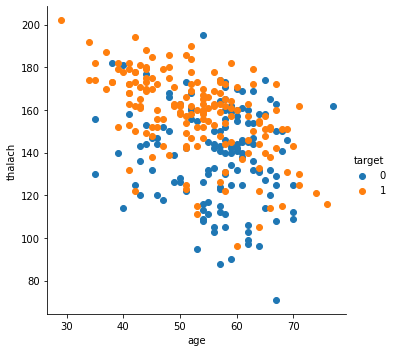

In [136]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "age", "thalach") \
   .add_legend()
plt.show()

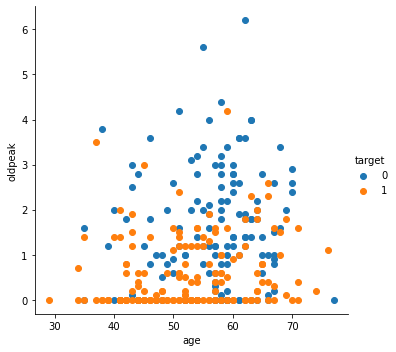

In [137]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "age", "oldpeak") \
   .add_legend()
plt.show()

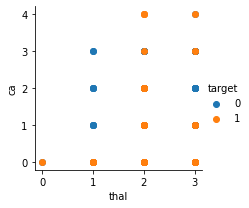

In [138]:
sns.FacetGrid(df, hue="target", height=3) \
   .map(plt.scatter, "thal", "ca") \
   .add_legend()
plt.show()

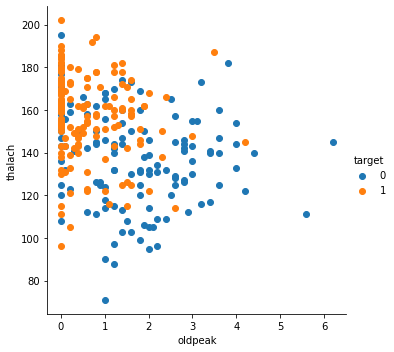

In [139]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "oldpeak", "thalach") \
   .add_legend()
plt.show()

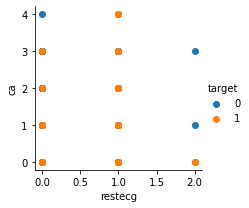

In [140]:
sns.FacetGrid(df, hue="target", height=3) \
   .map(plt.scatter, "restecg", "ca") \
   .add_legend()
plt.show()

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [142]:
# For 'cp' column, it records chest pain type. Number 3 mean no chest pain, number 0-2 means different tyoe of angina. 

# To simplify it, I will group the number 0-2 together as disease positive, number 3 as disease negative

In [143]:
number=[0,1,2]
for col in df.itertuples():

    if col.cp in number:
        df['cp'].replace(to_replace=col.cp, value=1, inplace=True)

## Testing the accuracy when the top 8 features are used for fitting

In [144]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
df = df.astype(float)

In [146]:
df_top8 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [147]:
df_top8.head()

,cp,oldpeak,thal,ca,thalach,age,chol,trestbps,exang
0,1.0,2.3,1.0,0.0,150.0,63.0,233.0,145.0,0.0
1,2.0,3.5,2.0,0.0,187.0,37.0,250.0,130.0,0.0
2,1.0,1.4,2.0,0.0,172.0,41.0,204.0,130.0,0.0
3,1.0,0.8,2.0,0.0,178.0,56.0,236.0,120.0,0.0
4,0.0,0.6,2.0,0.0,163.0,57.0,354.0,120.0,1.0


In [148]:
df_top8.isnull().sum()

cp          5
oldpeak     0
thal        0
ca          0
thalach     0
age         0
chol        0
trestbps    0
exang       0
dtype: int64

In [149]:
df_top8 = df_top8.interpolate(method='ffill')
y=df['target']

In [150]:
df_top8.isnull().sum()

cp          0
oldpeak     0
thal        0
ca          0
thalach     0
age         0
chol        0
trestbps    0
exang       0
dtype: int64

## Maybe, Standardization could hep ?

In [171]:
x_train,x_test,y_train,y_test = train_test_split(df_top8,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
model=clf.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.868421052631579


Confusion Matrix:  [[27  4]
 [ 6 39]]


Precision:  [0.81818182 0.90697674]
Recall:     [0.87096774 0.86666667]
Fscore:     [0.84375    0.88636364]
Support:    [31 45]


In [172]:
x_train.head()

,cp,oldpeak,thal,ca,thalach,age,chol,trestbps,exang
173,2.0,3.2,3.0,2.0,173.0,58.0,224.0,132.0,0.0
261,0.0,0.0,2.0,1.0,160.0,52.0,230.0,112.0,0.0
37,2.0,1.6,3.0,0.0,165.0,54.0,232.0,150.0,0.0
101,3.0,4.2,3.0,0.0,145.0,59.0,270.0,178.0,0.0
166,0.0,2.6,3.0,2.0,129.0,67.0,229.0,120.0,1.0


In [173]:
x_test.head()

,cp,oldpeak,thal,ca,thalach,age,chol,trestbps,exang
225,0.0,2.6,3.0,0.0,125.0,70.0,174.0,145.0,1.0
152,3.0,0.6,3.0,0.0,155.0,64.0,227.0,170.0,0.0
228,3.0,0.2,3.0,0.0,159.0,59.0,288.0,170.0,0.0
201,0.0,2.8,3.0,1.0,141.0,60.0,258.0,125.0,1.0
52,2.0,1.8,3.0,3.0,146.0,62.0,231.0,130.0,0.0


In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
df = df.interpolate(method='ffill')

In [176]:
x = df.iloc[:,:-1]
scale = StandardScaler()
x_std = scale.fit_transform(x)

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.868421052631579


Confusion Matrix:  [[26  3]
 [ 7 40]]


Precision:  [0.78787879 0.93023256]
Recall:     [0.89655172 0.85106383]
Fscore:     [0.83870968 0.88888889]
Support:    [29 47]


In [178]:
# Not much of a difference using Standardization


### Accuracy with different test sizes

In [179]:
testSize = [0.5,0.4,0.3,0.25,0.2,0.15,0.1]

acc = []
for i in testSize:
    x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=i)
    clf = AdaBoostClassifier()
    clf.fit(x_train,y_train)
    prediction=clf.predict(x_test)
    acc.append(accuracy_score(prediction,y_test))

models_dataframe=pd.DataFrame(acc,index=testSize)   
models_dataframe

,0
0.50,0.815789
0.40,0.852459
0.30,0.769231
0.25,0.842105
0.20,0.803279
0.15,0.869565
0.10,0.774194


### We can conclude that training size in the range 70% to 75% gives the optimal result, otherwise the data faces the issues of either under fitting or over fitting

In [180]:
import pickle
pickle.dump(model, open("ada.pkl", "wb"))